In [1]:
import matplotlib.pyplot as plt
import csv
import json
import pywt
import pandas as pd
import numpy as np
import os

In [2]:
DATA_DIR = '/nfs/ada/jbrook1/users/qdang1/Descartes/Cognitive_battery_dissertation/data/'#backup_ecg_30s_non_overlaped_no_standardlization/'
DATA_DIR


'/nfs/ada/jbrook1/users/qdang1/Descartes/Cognitive_battery_dissertation/data/'

In [3]:
MODEL_NAME = 'eda_ploting'
RUN = 'run10_' + MODEL_NAME+ '/'

CURRENT_DIR = os.getcwd()
DATA_DIR = CURRENT_DIR + '/data/'
MASTER_OUTPUT_DIR = CURRENT_DIR + '/output/'
OUTPUT_DIR = MASTER_OUTPUT_DIR + RUN
print(DATA_DIR)
print(OUTPUT_DIR)



/nfs/ada/jbrook1/users/qdang1/Descartes/Cognitive_battery_dissertation/data/
/nfs/ada/jbrook1/users/qdang1/Descartes/Cognitive_battery_dissertation/output/run10_eda_ploting/


In [4]:
os.makedirs(OUTPUT_DIR, exist_ok=True)

In [5]:
# Initialize an empty list to store the arrays
X_dict = {}
Y_dict = {}

# Load each file and append the array to the list
for i in range(5):
    X_filename = f'X_fold{i}.npy'
    X_dict[i] = np.load(DATA_DIR + X_filename, allow_pickle=True)

    Y_filename = f'Y_fold{i}.npy'
    Y_dict[i] = np.load(DATA_DIR + Y_filename,  allow_pickle=True)

for i in range(5):
    print(f'i: {i}, X: {X_dict[i].shape}, Y: {Y_dict[i].shape}')

i: 0, X: (6105, 8), Y: (6105, 2)
i: 1, X: (6459, 8), Y: (6459, 2)
i: 2, X: (6814, 8), Y: (6814, 2)
i: 3, X: (6146, 8), Y: (6146, 2)
i: 4, X: (5944, 8), Y: (5944, 2)


In [6]:
for index in range(1):
    train_list = [0, 1, 2, 3, 4]
    #train_list.remove(index)
    test_list = [index]

    print(f'train: {train_list}, test: {test_list}')

    X_train = X_dict[train_list[0]]
    Y_train = Y_dict[train_list[0]]
    X_test =  X_dict[test_list[0]]
    Y_test =  Y_dict[test_list[0]]
    
    for i_train in train_list[1:]:
        X_train = np.concatenate([X_train,X_dict[i_train] ],axis = 0)
        Y_train = np.concatenate([Y_train,Y_dict[i_train] ],axis = 0)

    # for i_test in test_list[1:]:
    #     X_test = np.concatenate([X_test,X_dict[i_test] ],axis = 0)
    #     Y_test = np.concatenate([Y_test,Y_dict[i_test] ],axis = 0)

    print(f'X_train: {X_train.shape}, Y_train: {Y_train.shape}, X_test : {X_test.shape}, Y_test: {Y_test.shape}')

train: [0, 1, 2, 3, 4], test: [0]
X_train: (31468, 8), Y_train: (31468, 2), X_test : (6105, 8), Y_test: (6105, 2)


In [7]:
X_train_demo          = np.array(X_train[:,0].tolist()).squeeze(1)
X_train_1_eye         = np.array(X_train[:,1].tolist())
X_train_1_eye_wavelet = np.array(X_train[:,2].tolist())
X_train_1_ecg         = np.array(X_train[:,3].tolist())
X_train_1_ecg_feature = np.array(X_train[:,4].tolist())
X_train_2_eye         = np.array(X_train[:,5].tolist())
X_train_2_ecg         = np.array(X_train[:,6].tolist())
X_train_2_ecg_feature = np.array(X_train[:,7].tolist())


In [8]:
X_train_1_ecg[0][:,1]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [9]:
X_baseline = np.unique(X_train_1_ecg, axis=0)
X_baseline_feature = np.unique(X_train_1_ecg_feature, axis=0)

In [10]:
feature_names = [
    'Heart rate mean', 'RR interval mean', 'SD for RR interval', 'Heart rate variability', 
    'SD 1', 'SD 2', 'Ratio SD1_SD2', 'Ratio of the next rr_interval > 50 ms', 
    'SNR value', 'Very low frequency power', 'Low frequency power', 
    'High Frequency power', 'Ratio LF_HF'
]

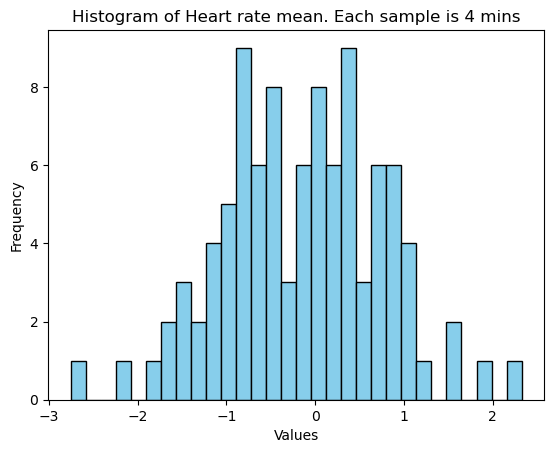

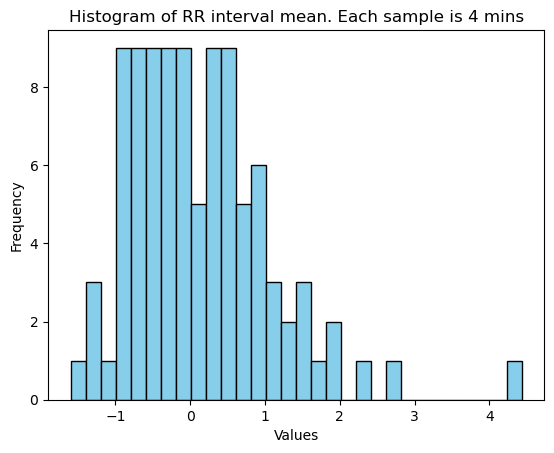

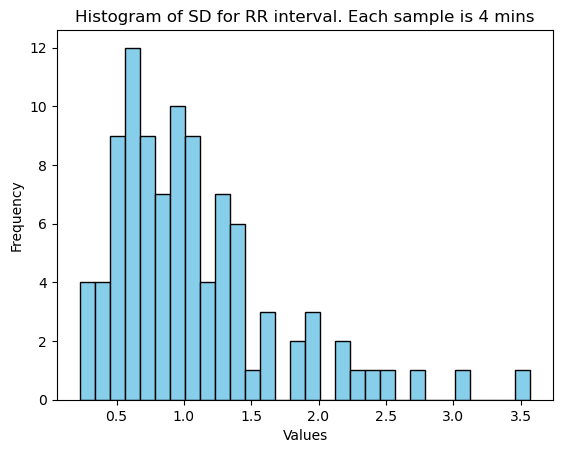

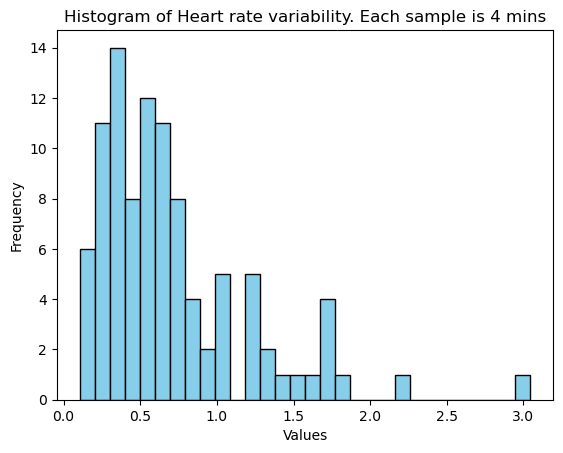

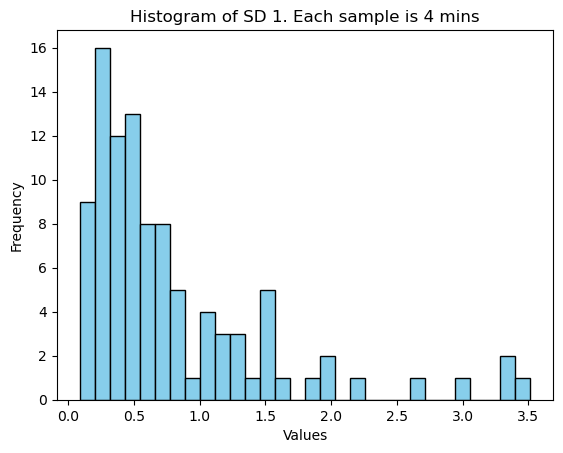

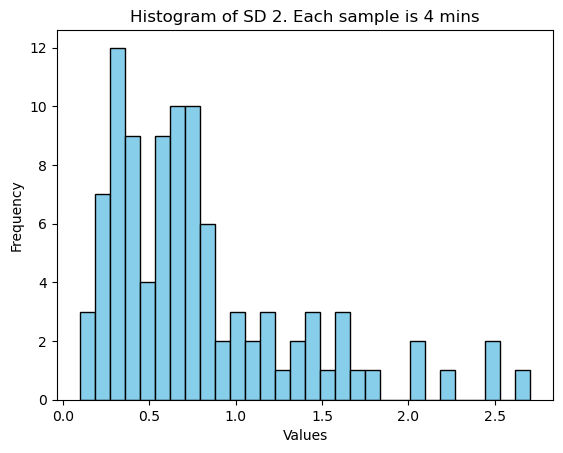

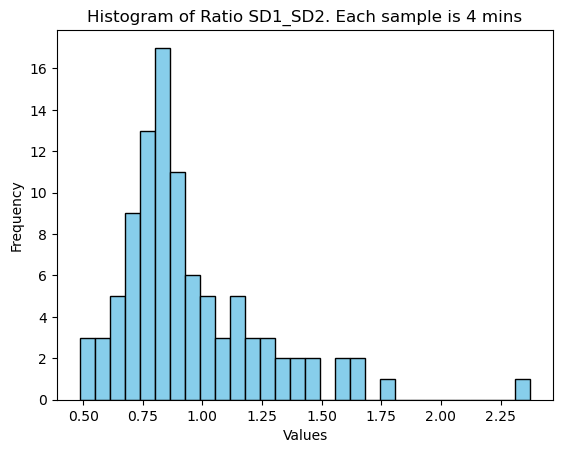

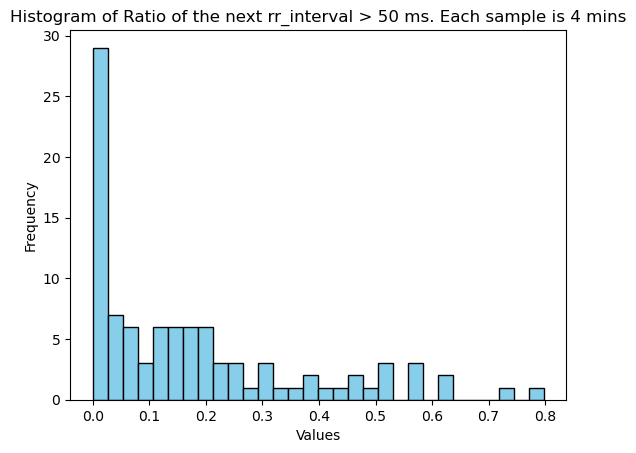

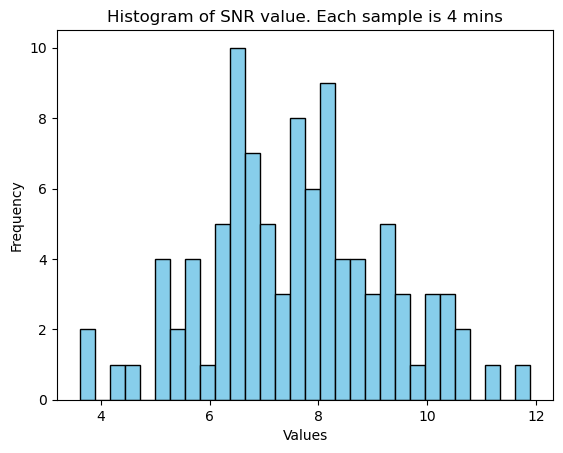

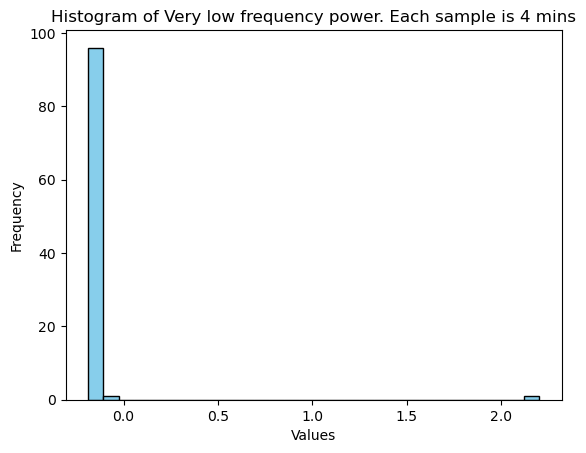

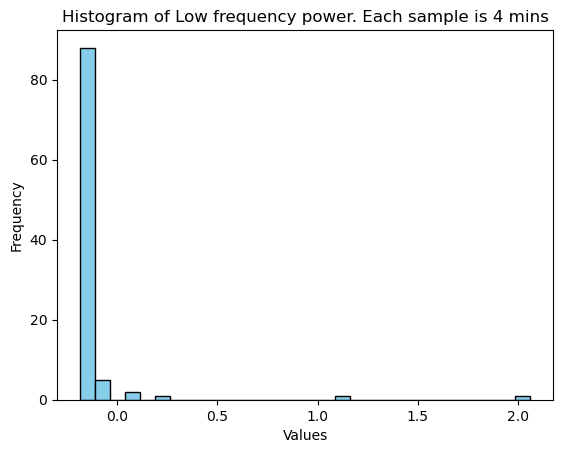

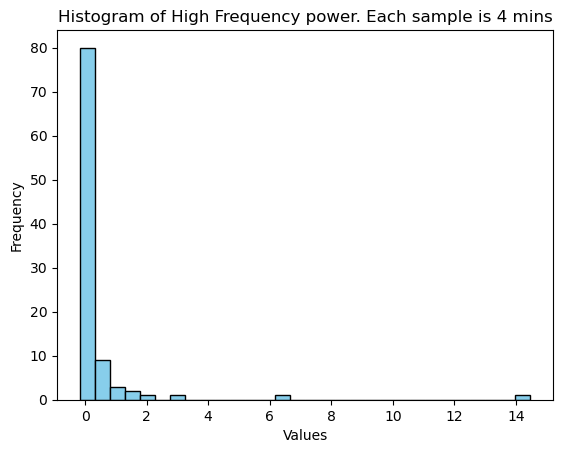

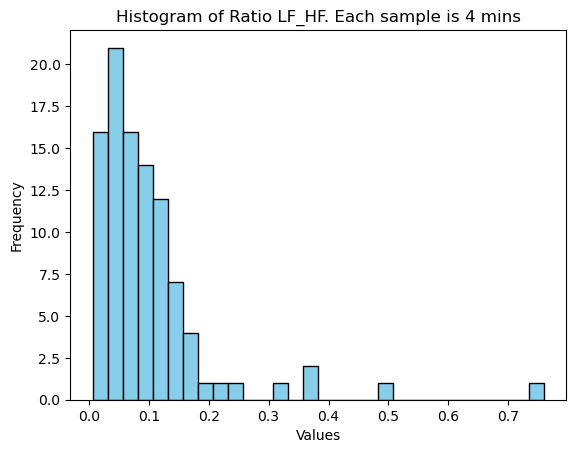

In [11]:
# Plot histograms for each feature
for i, feature_name in enumerate(feature_names):
    plt.figure()
    plt.hist(X_baseline_feature[:, i], bins=30, color='skyblue', edgecolor='black')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {feature_name}. Each sample is 4 mins')
    plt.savefig(os.path.join(OUTPUT_DIR, f'baseline_{feature_name}.png'))
    plt.show()
    plt.close()

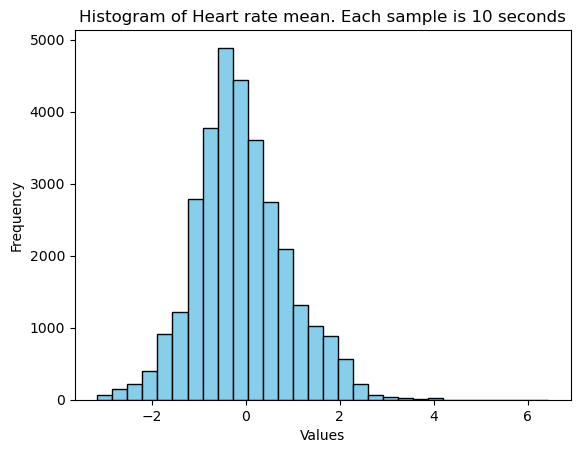

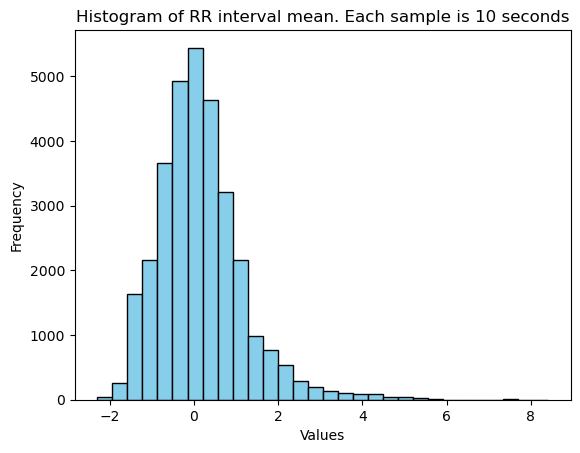

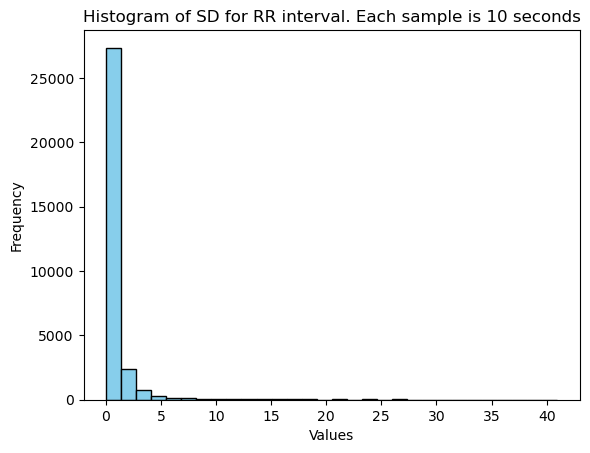

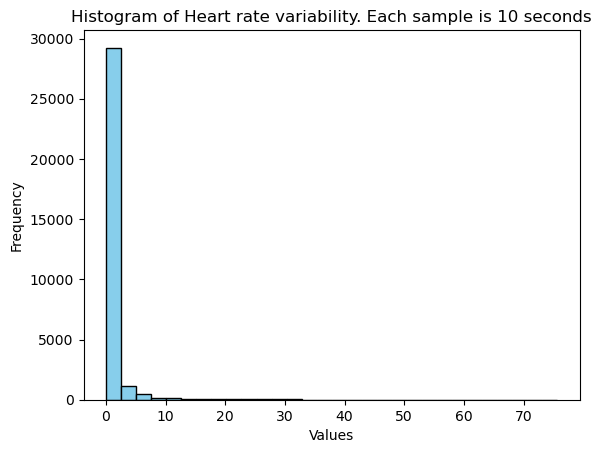

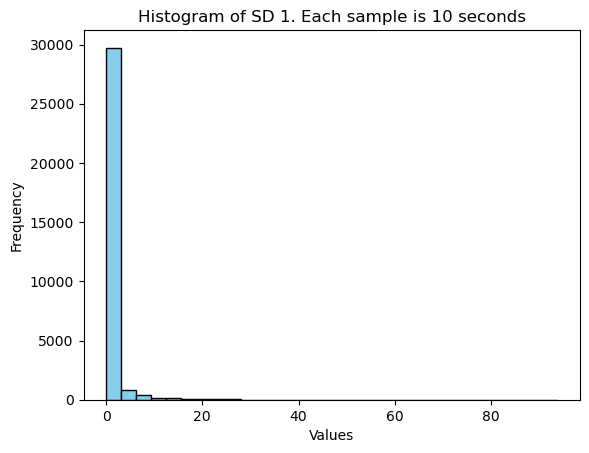

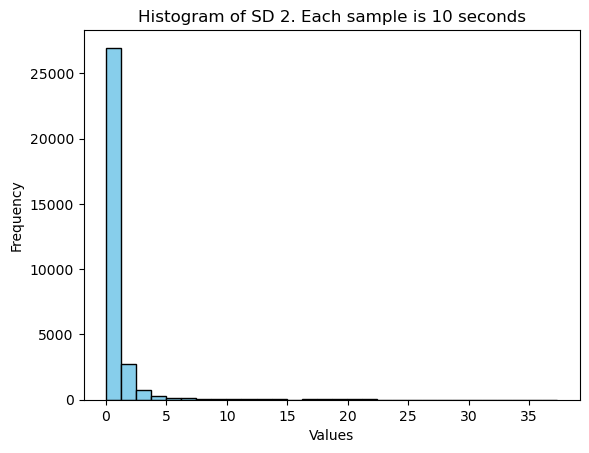

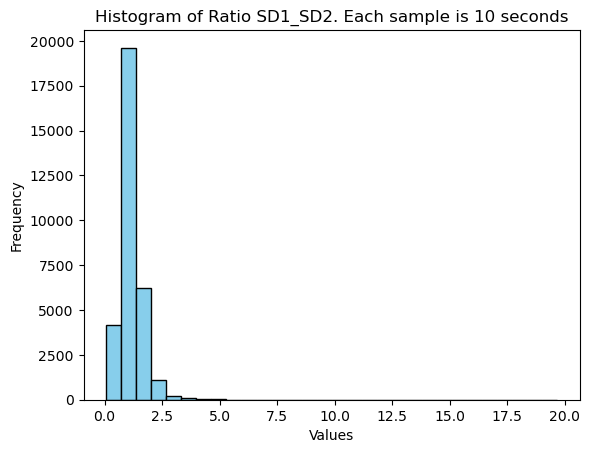

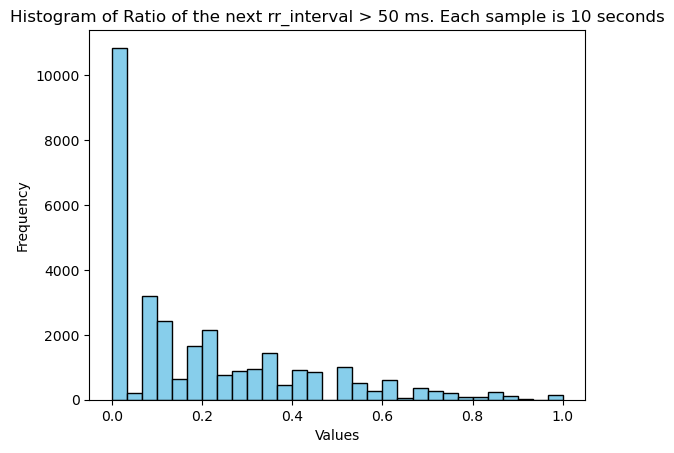

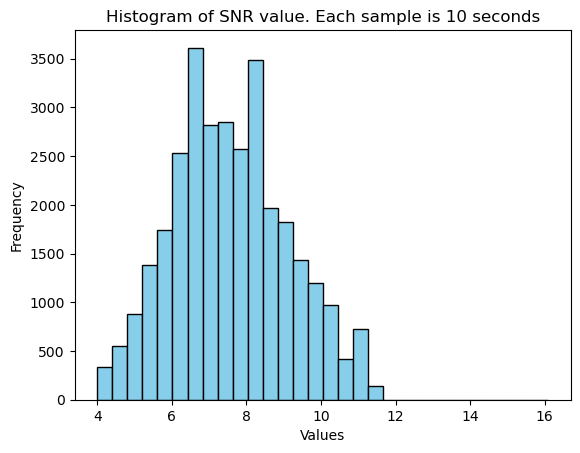

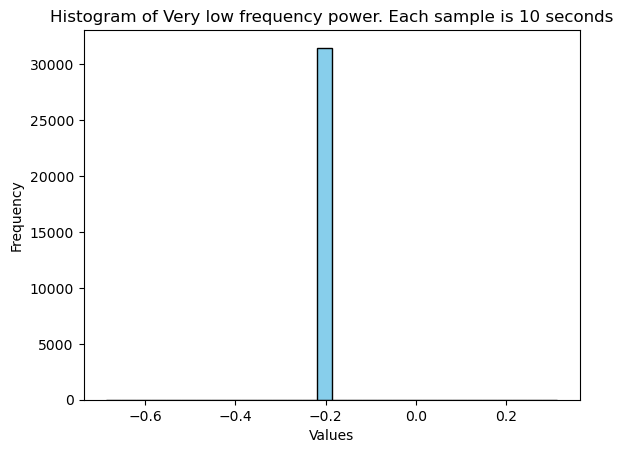

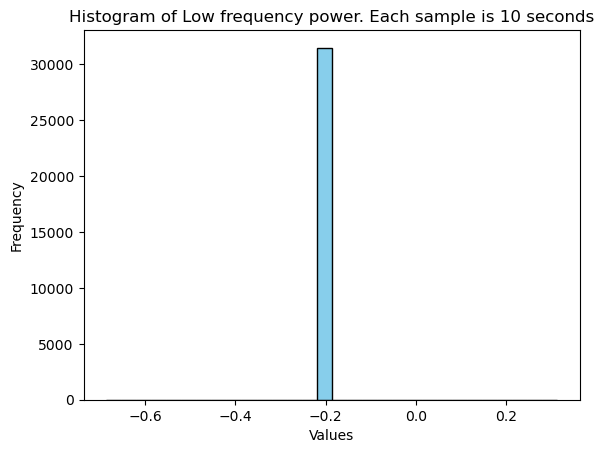

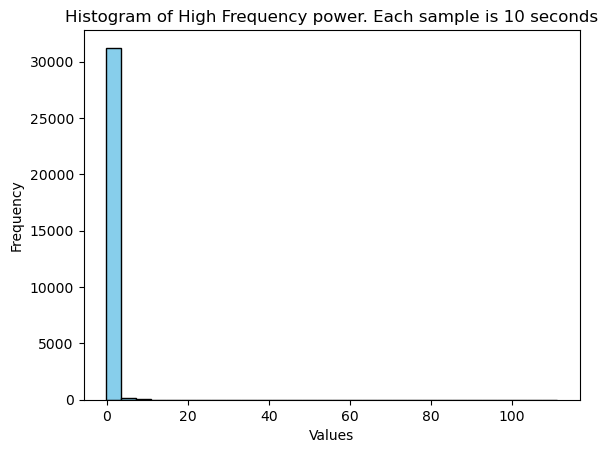

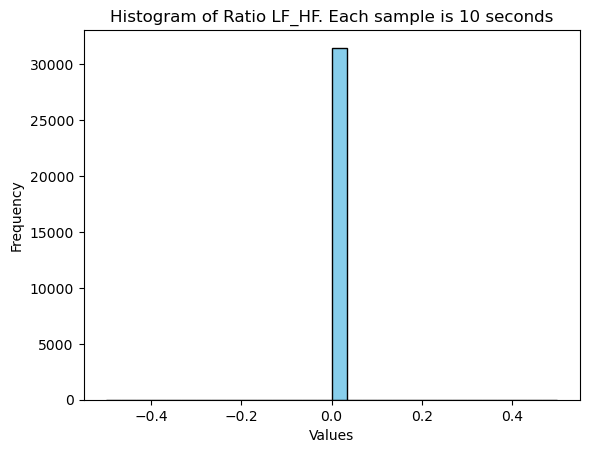

In [15]:
# Plot histograms for each feature
for i, feature_name in enumerate(feature_names):
    plt.figure()
    plt.hist(X_train_2_ecg_feature[:, i], bins=30, color='skyblue', edgecolor='black')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {feature_name}. Each sample is 10 seconds')
    plt.savefig(os.path.join(OUTPUT_DIR, f'samples_{feature_name}.png'))
    plt.show()
    plt.close()

#By Difficulty

In [16]:
difficulty_levels = ['Easy', 'Medium', 'Hard']

Y_train_diff = Y_train[:,0]
Y_train_diff

array([2, 2, 2, ..., 1, 1, 1], dtype=object)

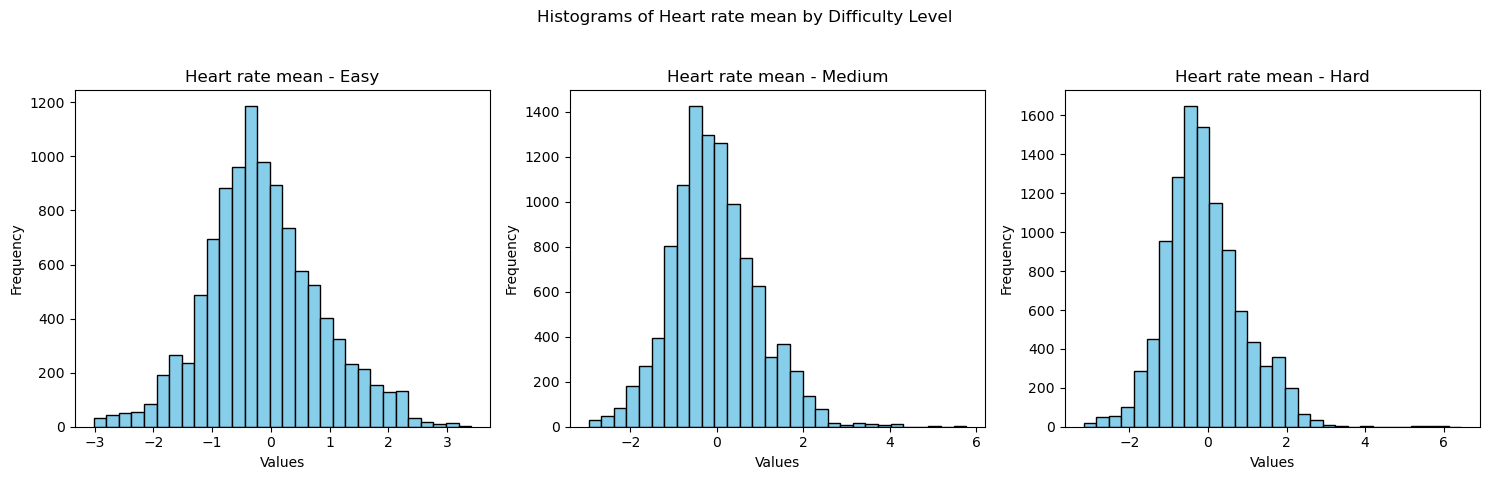

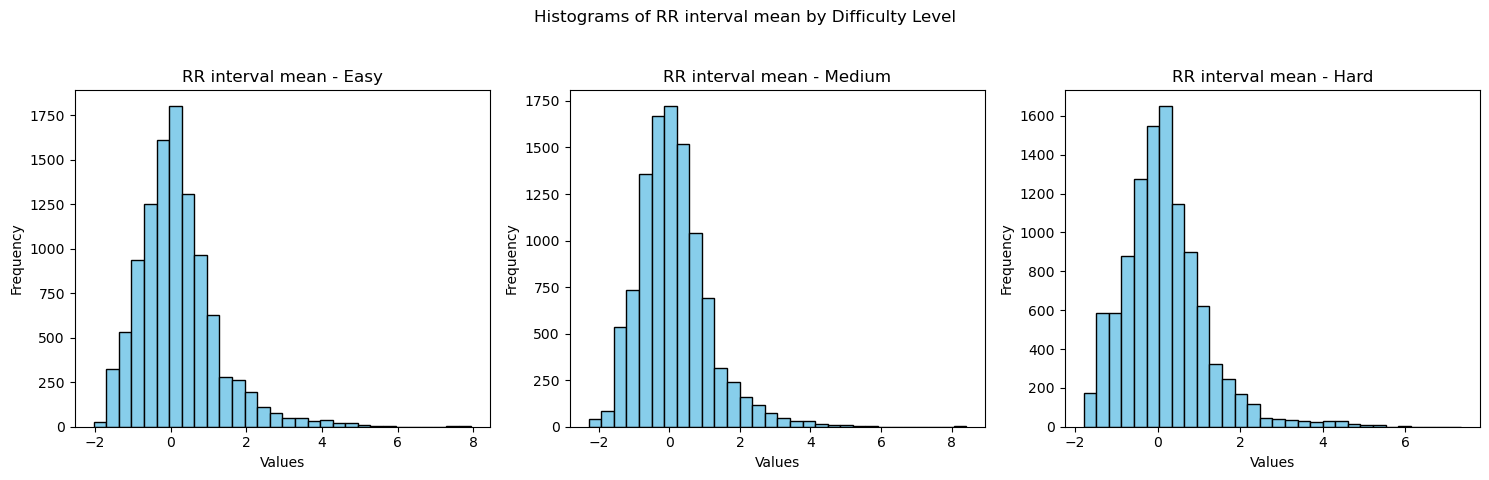

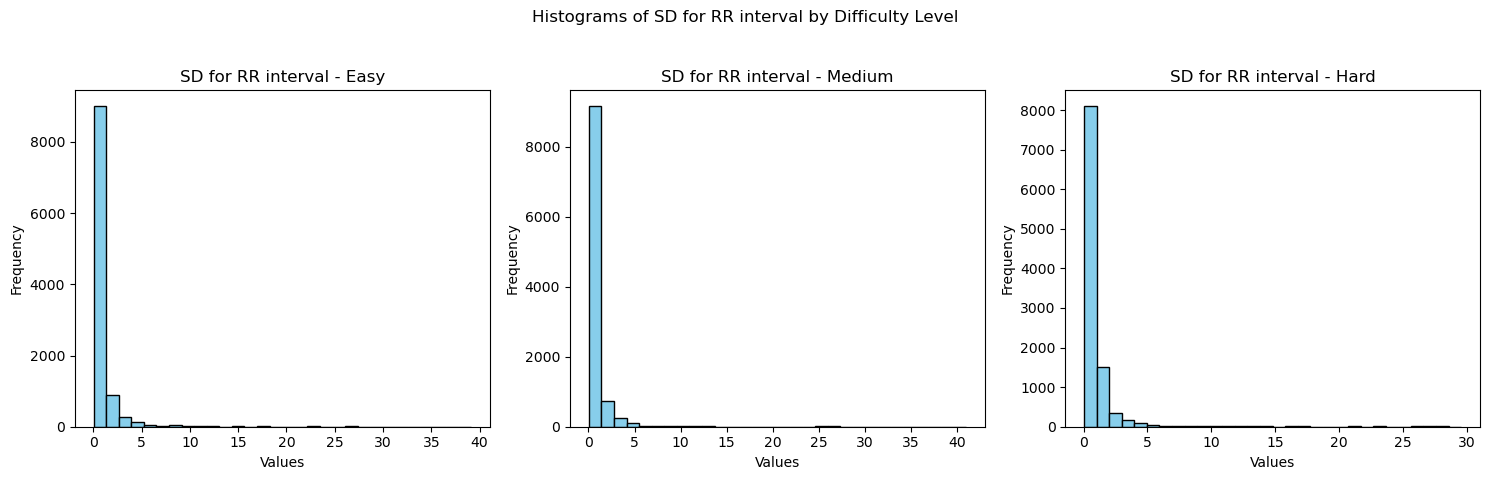

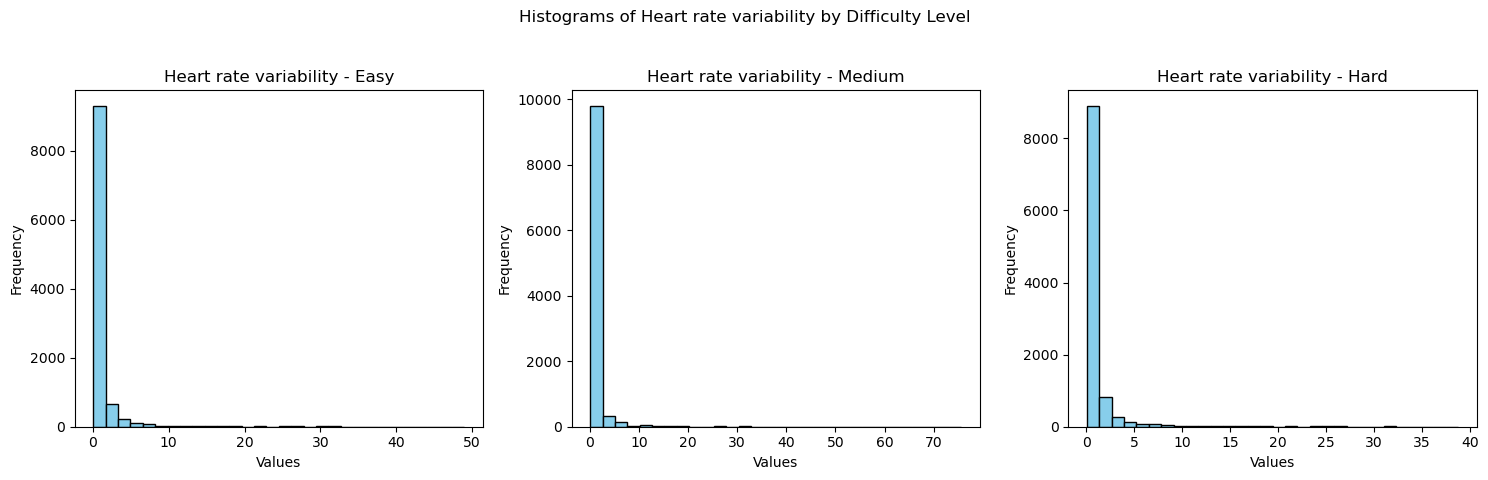

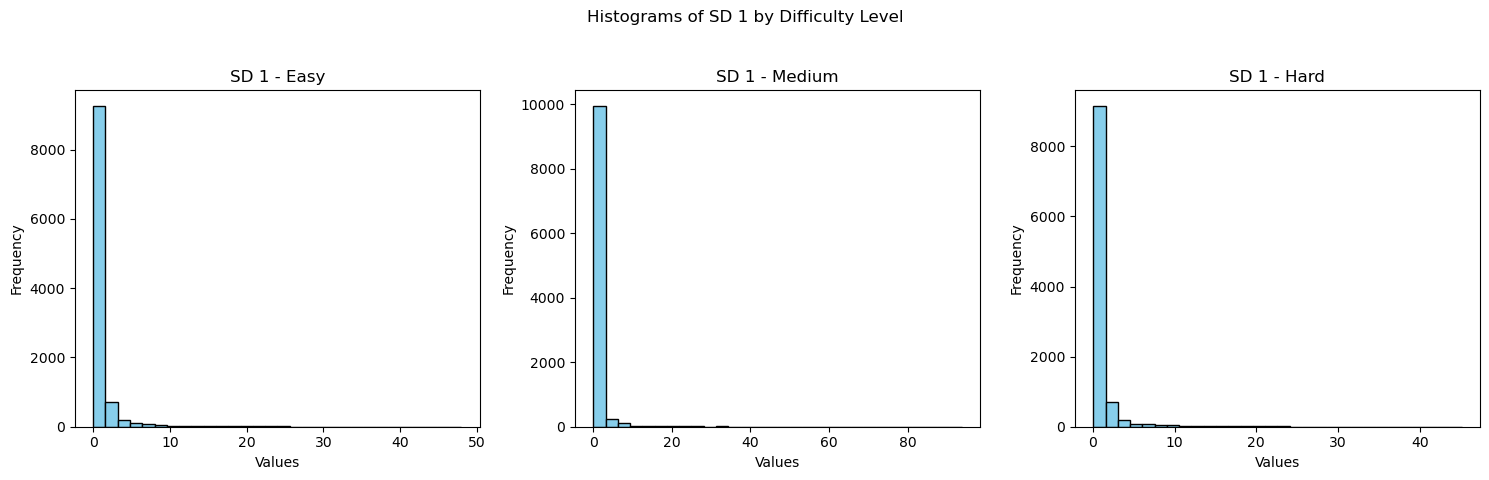

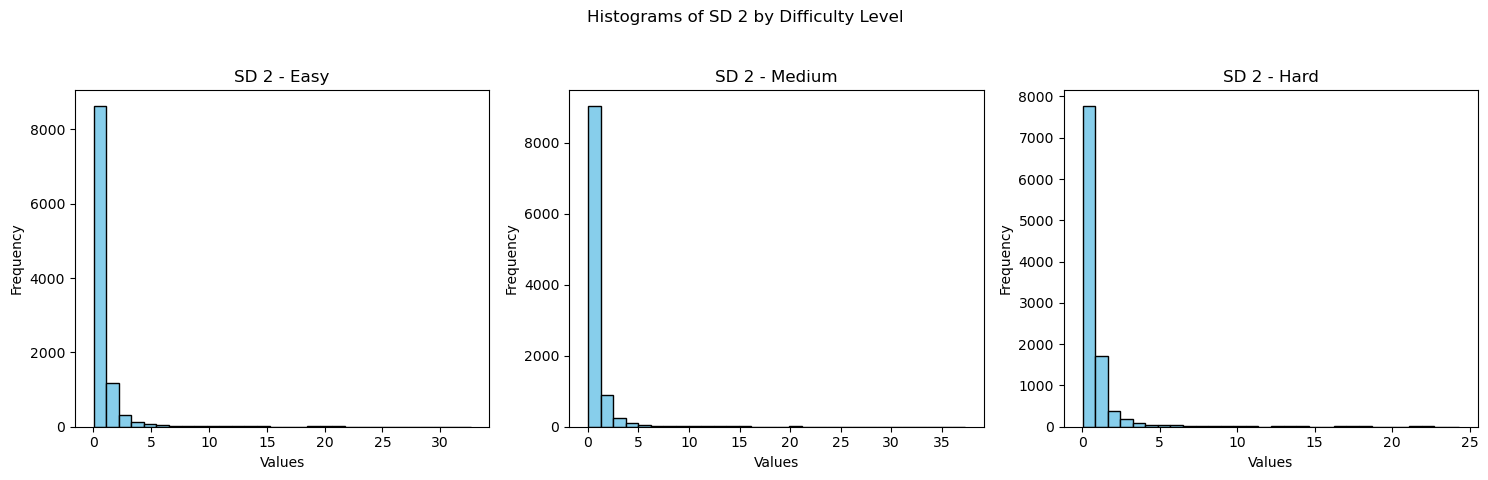

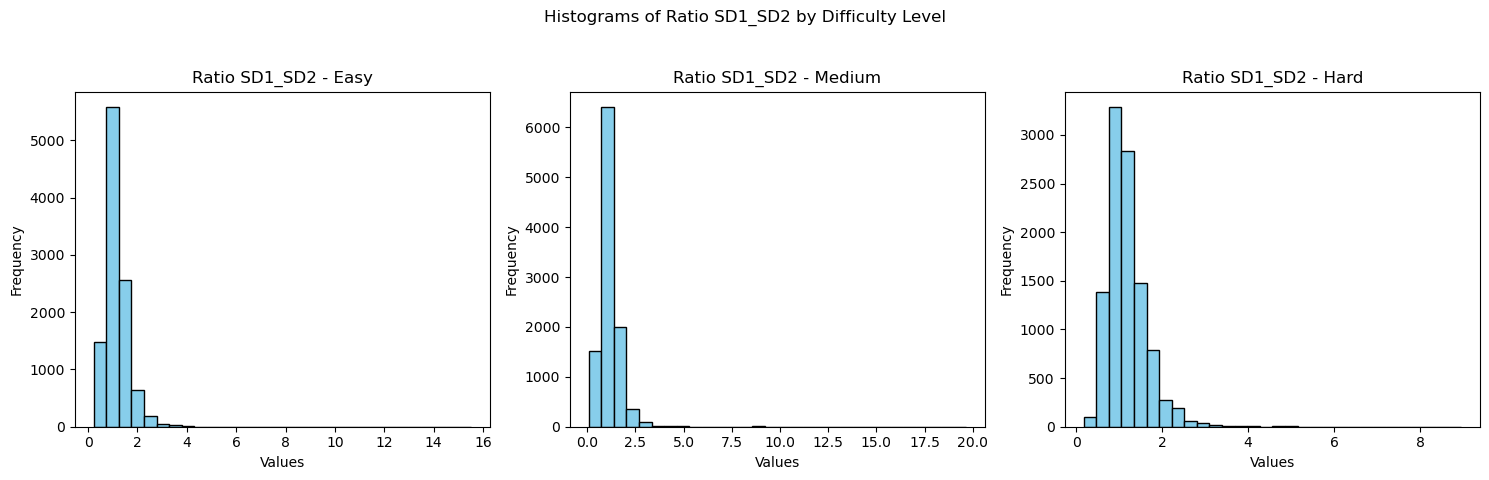

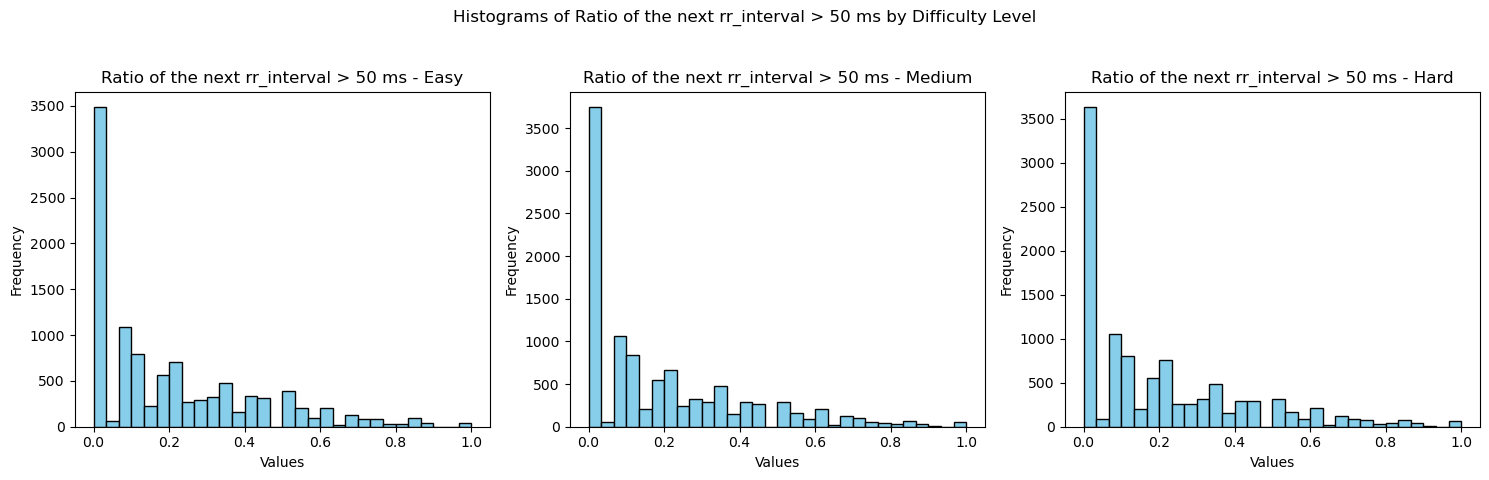

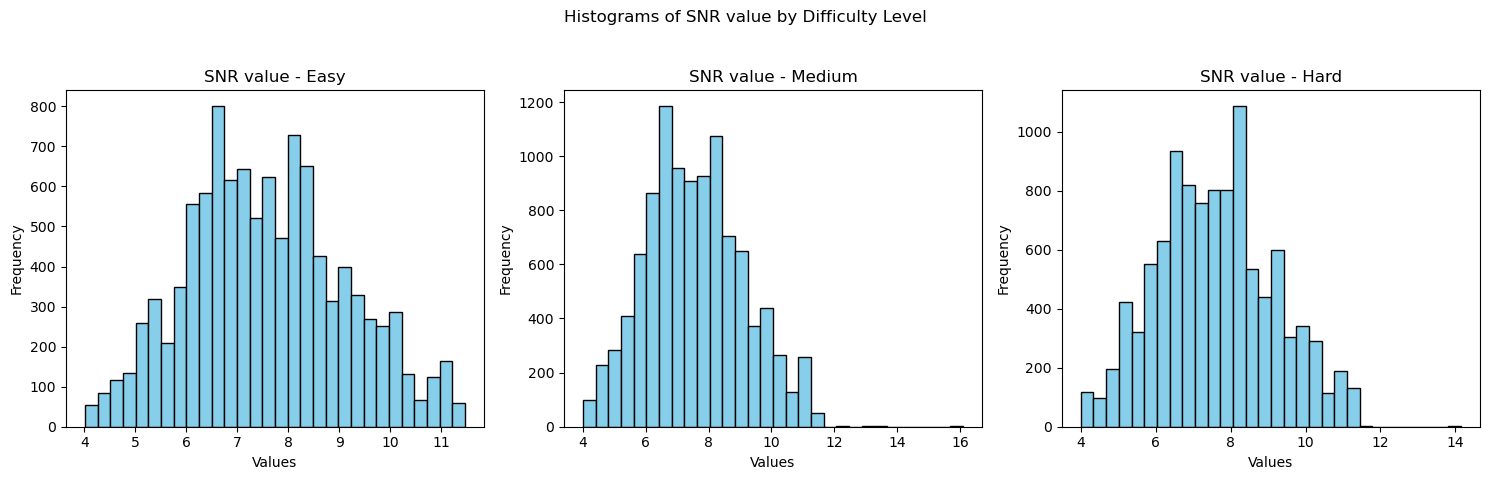

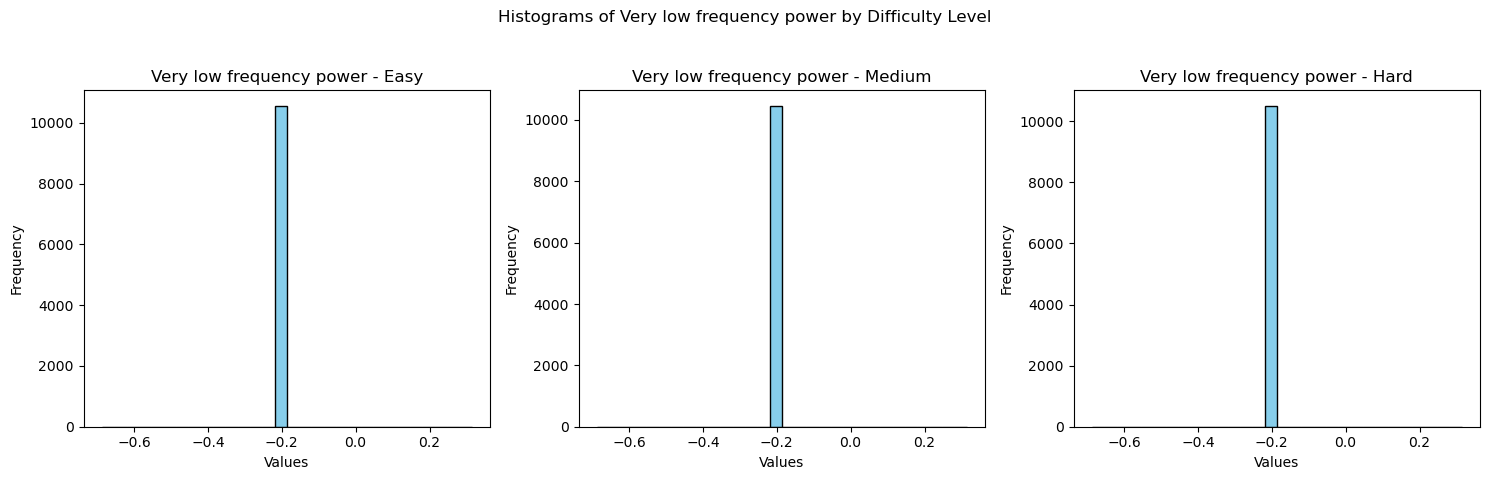

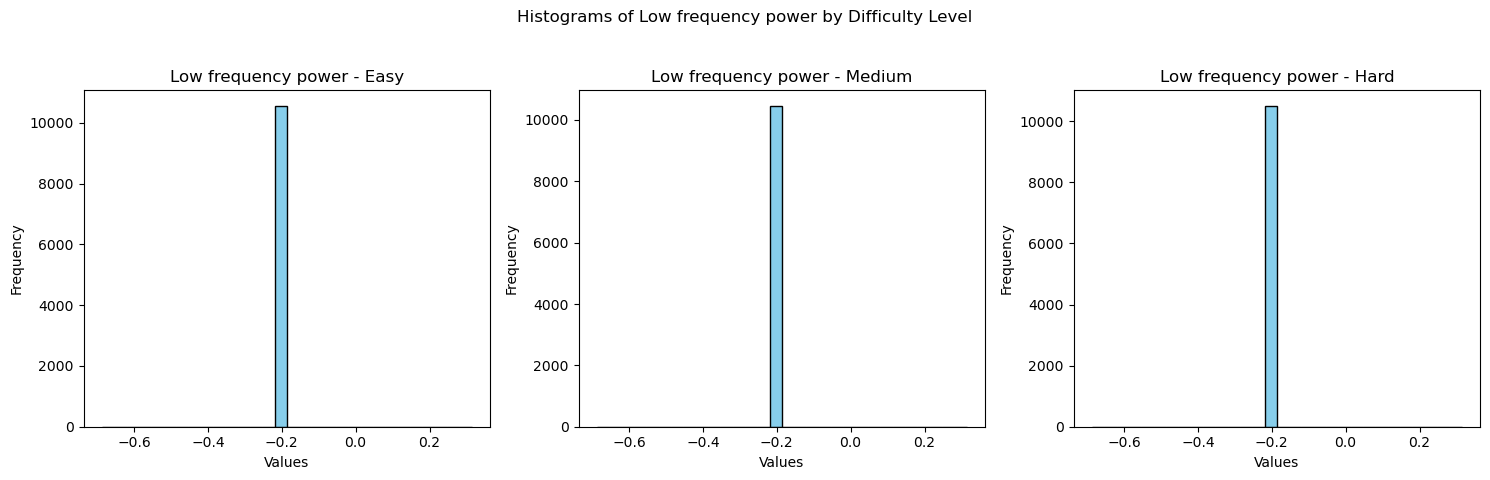

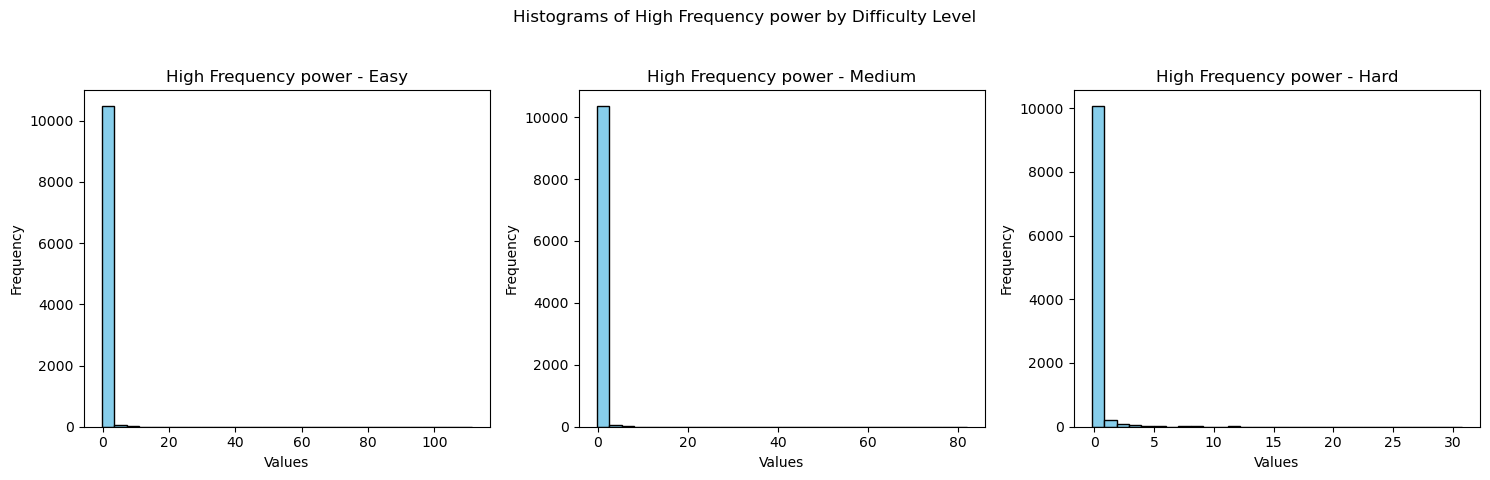

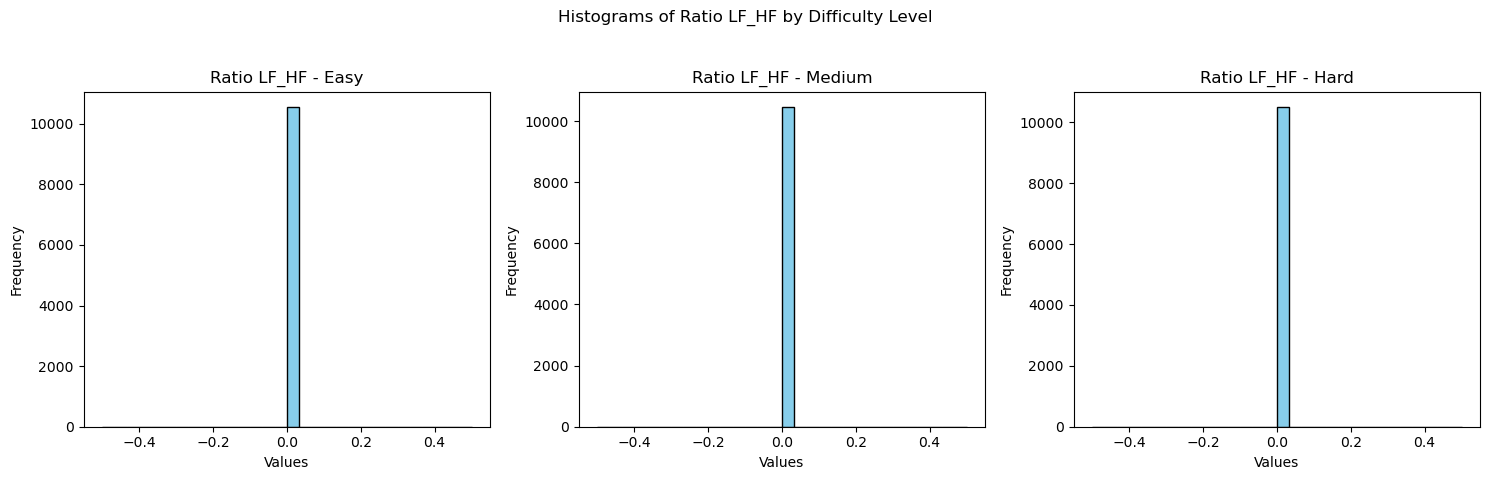

In [17]:
# Plot histograms for each feature and difficulty level
for i, feature_name in enumerate(feature_names):
    plt.figure(figsize=(15, 5))
    
    for j, difficulty in enumerate(difficulty_levels):
        plt.subplot(1, 3, j + 1)
        mask = Y_train_diff == j
        plt.hist(X_train_2_ecg_feature[mask, i], bins=30, color='skyblue', edgecolor='black')
        plt.xlabel('Values')
        plt.ylabel('Frequency')
        plt.title(f'{feature_name} - {difficulty}')
    
    plt.suptitle(f'Histograms of {feature_name} by Difficulty Level')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(os.path.join(OUTPUT_DIR, f'samples_by_difficulty_{feature_name}.png'))
    plt.show()
    plt.close()



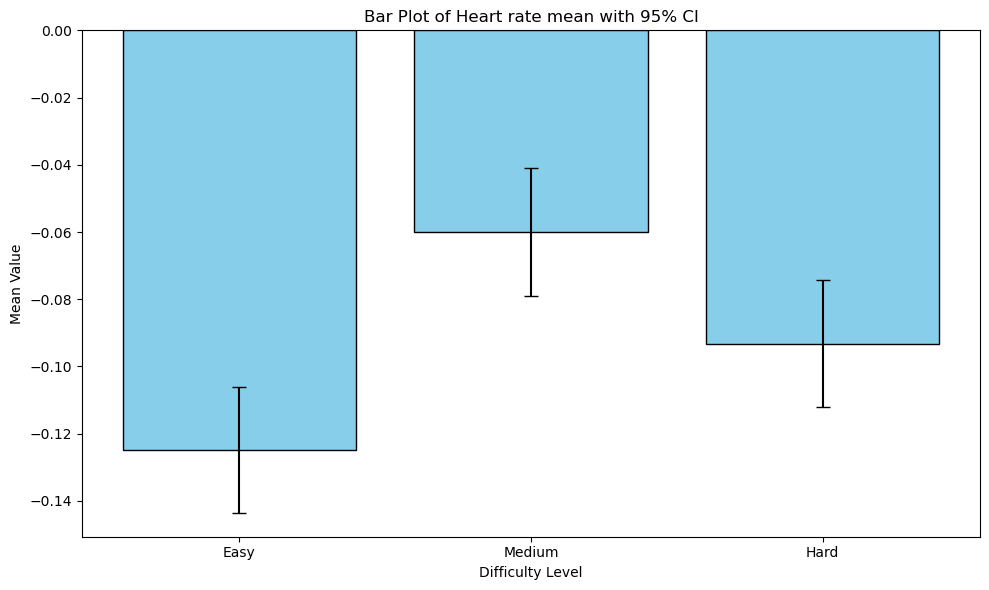

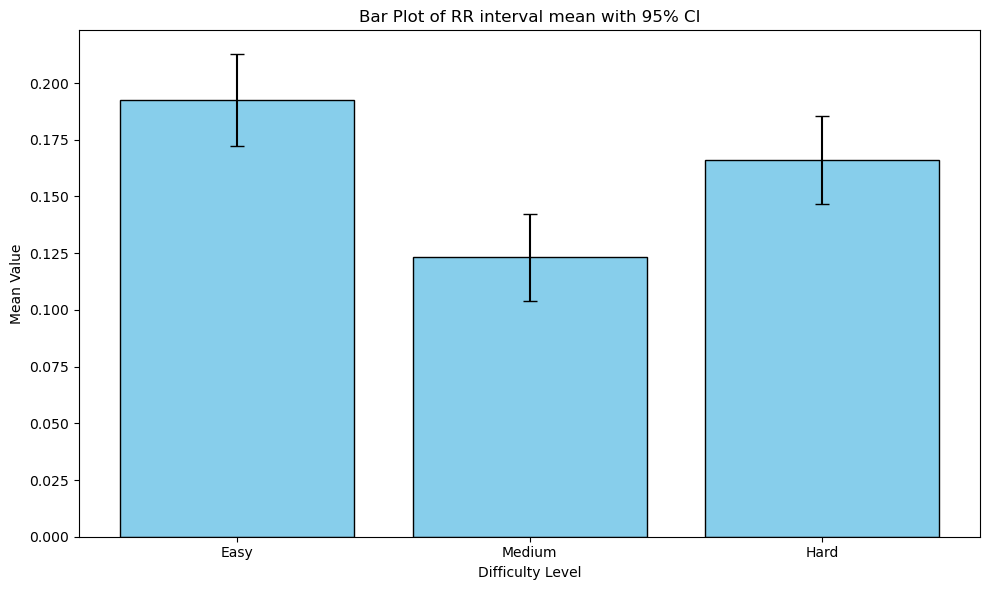

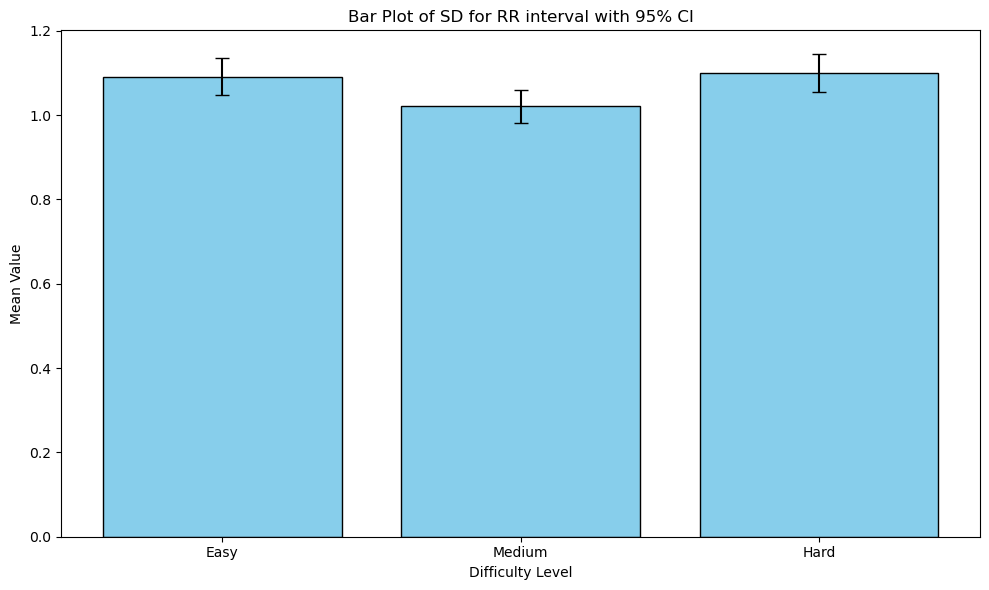

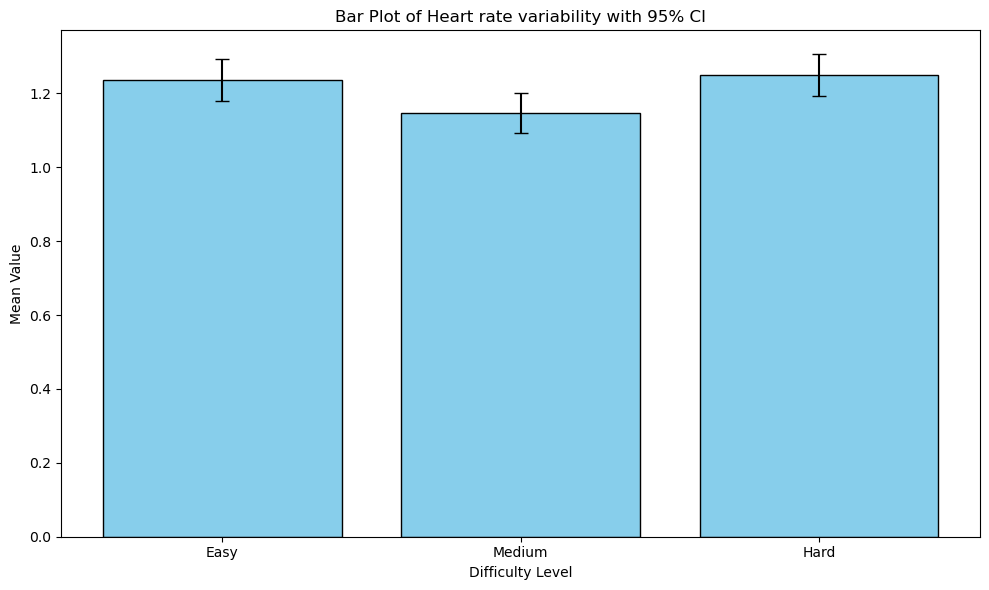

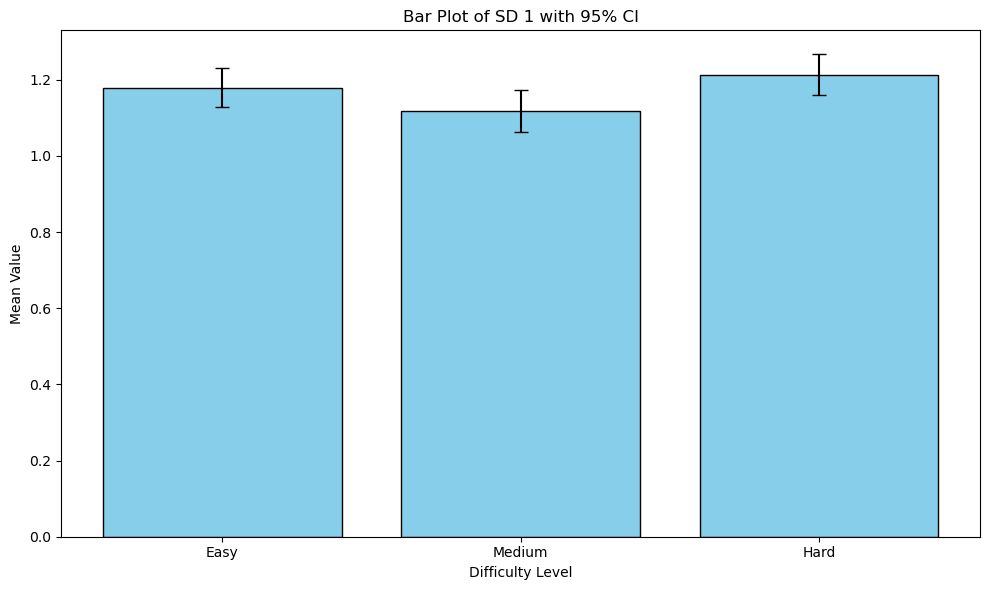

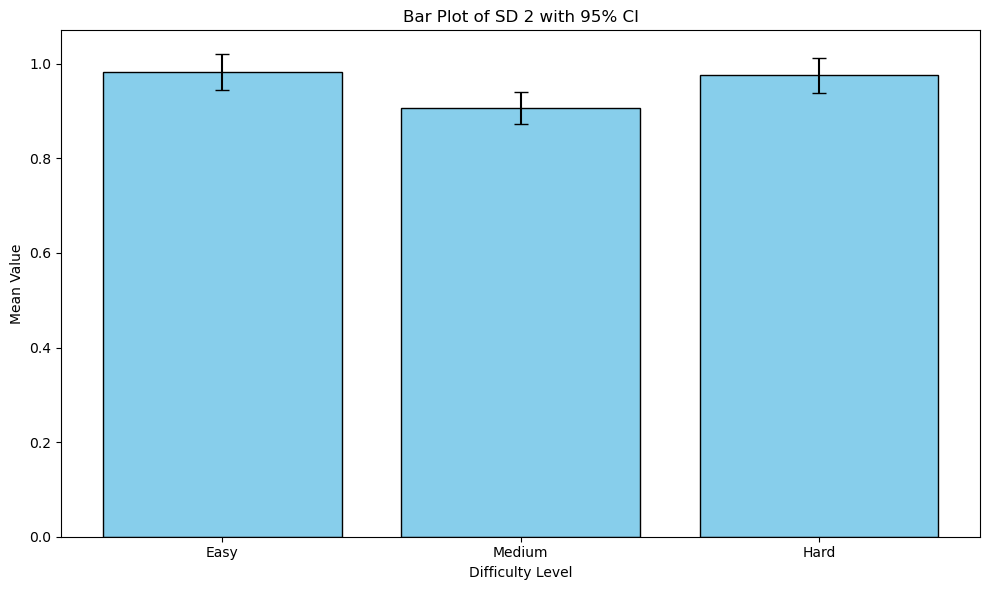

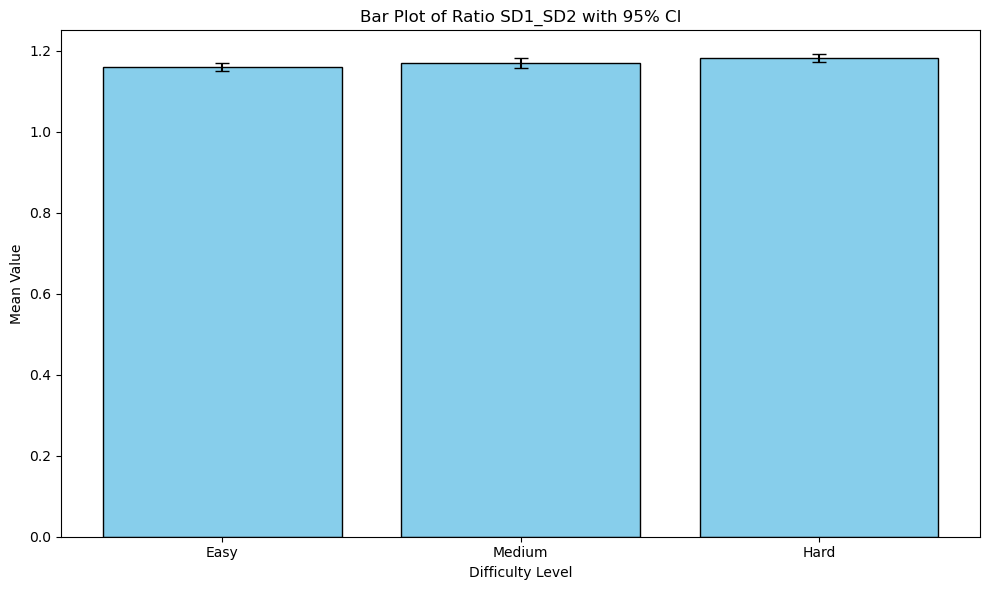

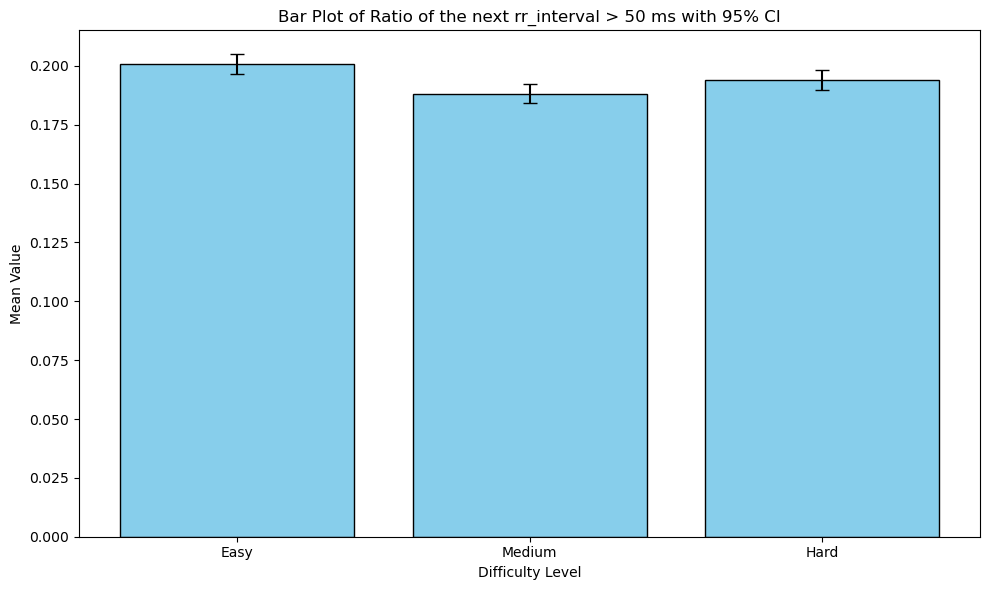

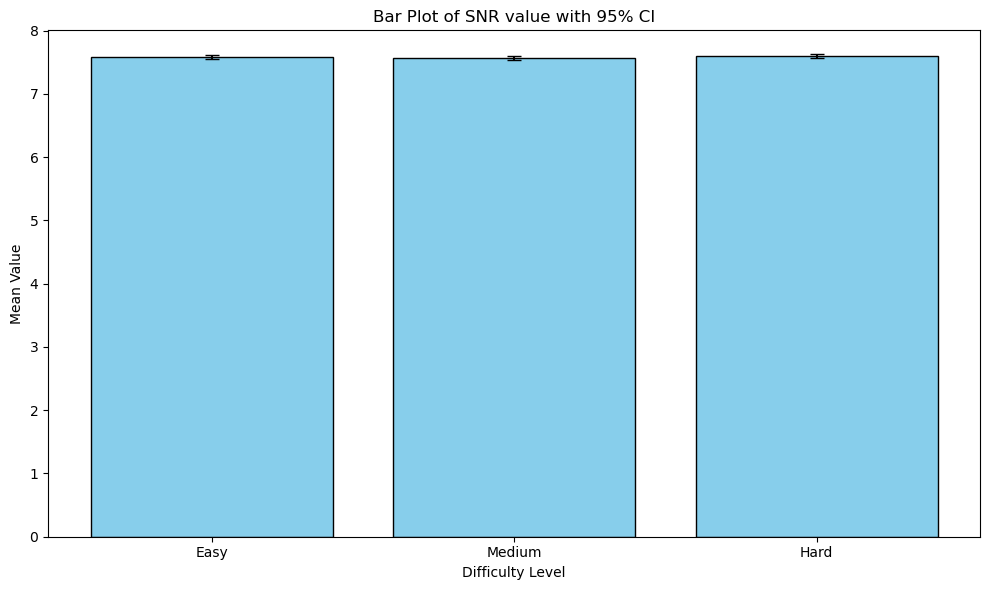

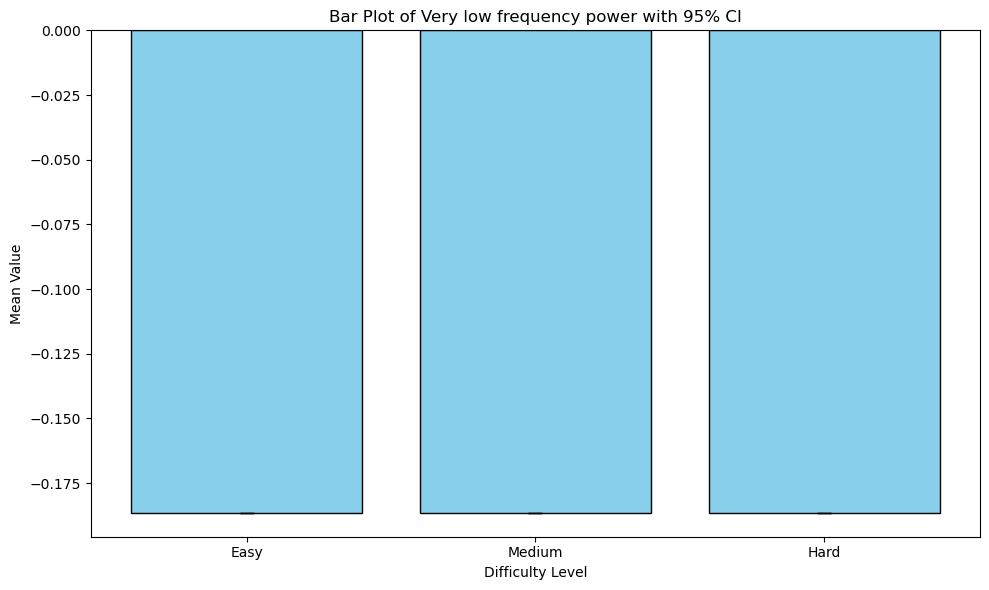

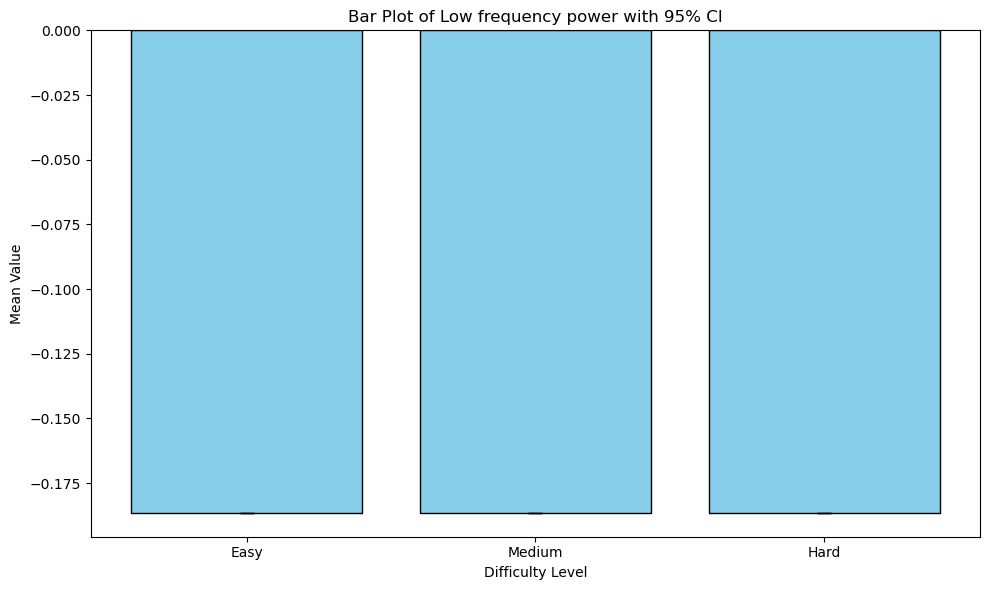

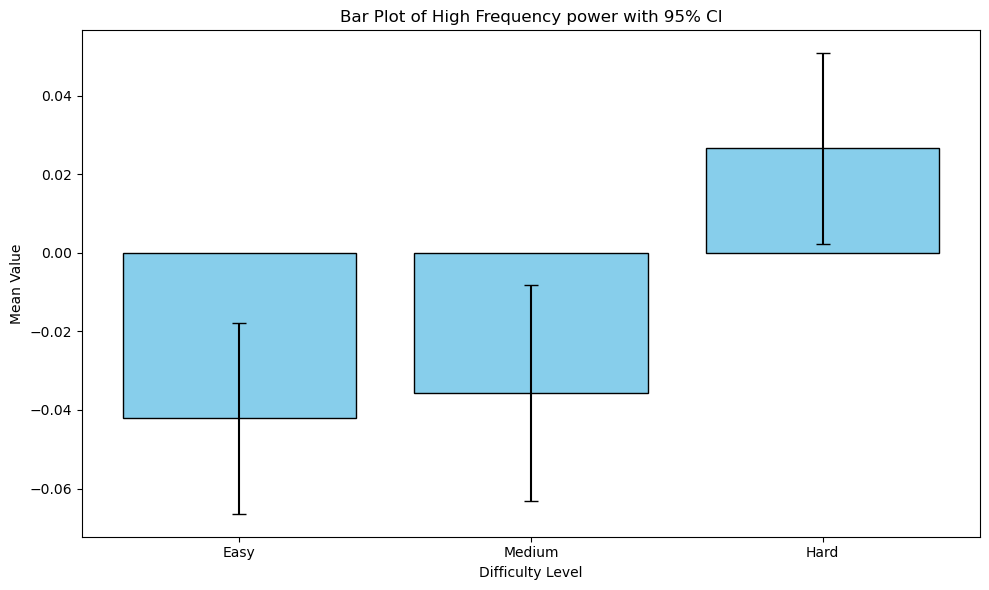

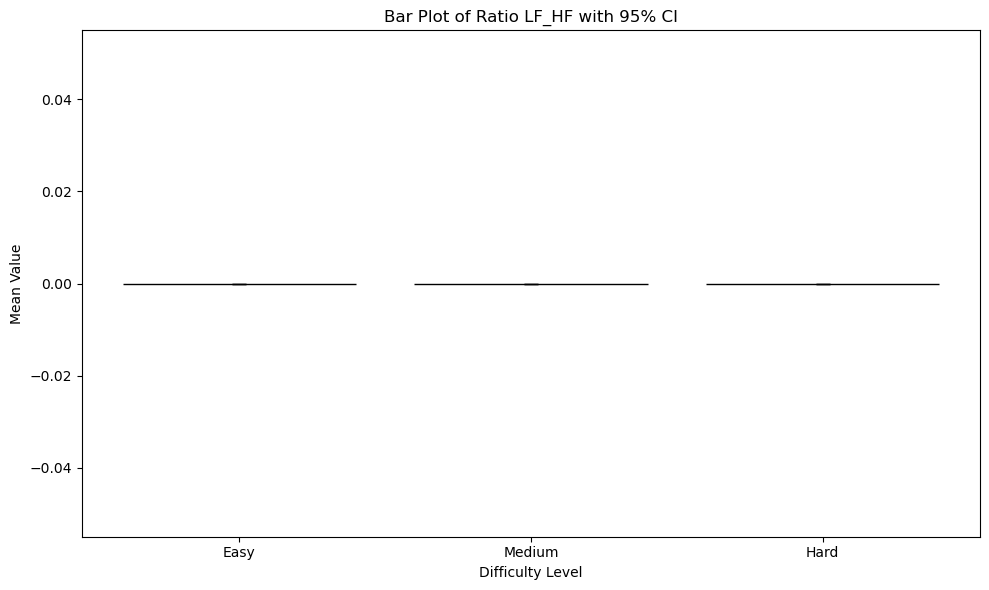

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import sem, t

# Function to calculate 95% CI
def mean_confidence_interval(data, confidence=0.95):
    n = len(data)
    m, se = np.mean(data), sem(data)
    h = se * t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

# Plot bar plots with 95% CI for each feature with hue as Y_train_diff
for i, feature_name in enumerate(feature_names):
    plt.figure(figsize=(10, 6))
    
    means = []
    lows = []
    highs = []
    labels = []
    
    for j, difficulty in enumerate(difficulty_levels):
        mask = Y_train_diff == j
        data = X_train_2_ecg_feature[mask, i]
        
        # Calculate mean and 95% CI
        mean, low, high = mean_confidence_interval(data)
        means.append(mean)
        lows.append(low)
        highs.append(high)
        labels.append(difficulty)
    
    # Plot bar plot with error bars
    x = np.arange(len(difficulty_levels))
    plt.bar(x, means, yerr=[np.array(means) - np.array(lows), np.array(highs) - np.array(means)], capsize=5, color='skyblue', edgecolor='black')
    plt.xticks(x, labels)
    plt.xlabel('Difficulty Level')
    plt.ylabel('Mean Value')
    plt.title(f'Bar Plot of {feature_name} with 95% CI')
    
    plt.tight_layout()
    #plt.savefig(os.path.join(OUTPUT_DIR, f'samples_{feature_name}_barplot.png'))
    plt.show()
    plt.close()
